In [2]:
import numpy as np
import matplotlib.pyplot as plt 

from toy_script import load_data


In [3]:
#Data importation
X_train, y_train, X_test = load_data("./")

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


The line $i^{th}$ gives the $i^{th}$ time serie, where $i\in [0,3499]$.

The column $512\times(j-2)+k$ gives the $k^{th}$ time step of the $j^{th}$ captor, where $k\in [0,511]$ and $j\in [2,33]$.

Therefore, X_train\[ i , 512 * ( j - 2 ) + k \] gives the $k^{th}$ time step of the $i^{th}$ time serie of the $j^{th}$ captor.

In [4]:
print(X_train[1,512*(5-2)+3])

2.03


Function that gives the captor's name related to the number of the captor.

In [24]:
def name_asso_to_captor_number(number:int):
    
    if number == 2:
        name = "Heart beat rate"
    elif number == 3:
        name = "Hand temperature"
    elif number in  (4,5,6):
        name = "Hand acceleration in one direction"
    elif number in (7,8,9):
        name = "Hand gyroscope in one direction"
    elif number in (10,11,12):
        name = "Hand magnetometer in one direction"
    elif number == 13:
        name = "Chest temperature"
    elif number in (14,15,16):
        name = "Chest acceleration in one direction"
    elif number in (17,18,19):
        name = "Chest gyroscope in one direction"
    elif number in (20,21,22):
        name = "Chest magnetometer in one direction"
    elif number == 23:
        name = "Foot temperature"
    elif number in (24,25,26):
        name = "Foot acceleration in one direction"
    elif number in (27,28,29):
        name = "Foot gyroscope in one direction"
    elif number in (30,31,32):
        name = "Foot magnetometer in one direction"
    else:
        raise ValueError("Wrong captor's number in function name_asso_to_captor_number")
    return name

#CD = captor dictionary

cd_number={
    "HBR":2,
    "HT":3,
    "HAX":4,
    "HAY":5,
    "HAZ":6,
    "HGX":7,
    "HGY":8,
    "HGZ":9,
    "HMX":10,
    "HMY":11,
    "HMZ":12,
    "CT":13,
    "CAX":14,
    "CAY":15,
    "CAZ":16,
    "CGX":17,
    "CGY":18,
    "CGZ":19,
    "CMX":20,
    "CMY":21,
    "CMZ":22,
    "FT":23,
    "FAX":24,
    "FAY":25,
    "FAZ":26,
    "FGX":27,
    "FGY":28,
    "FGZ":29,
    "FMX":30,
    "FMY":31,
    "FMZ":32
}
cd_name={
    2:"Heart beat rate",
    3:"Hand temperature",
    4:"Hand acceleration in the x direction",
    5:"Hand acceleration in the y direction",
    6:"Hand acceleration in the z direction",
    7:"Hand gyroscope in the x direction",
    8:"Hand gyroscope in the y direction",
    9:"Hand gyroscope in the z direction",
    10:"Hand magnetometer in the x direction",
    11:"Hand magnetometer in the y direction",
    12:"Hand magnetometer in the z direction",
    13:"Chest temperature",
    14:"Chest acceleration in the x direction",
    15:"Chest acceleration in the y direction",
    16:"Chest acceleration in the z direction",
    17:"Chest gyroscope in the x direction",
    18:"Chest gyroscope in the y direction",
    19:"Chest gyroscope in the z direction",
    20:"Chest magnetometer in the x direction",
    21:"Chest magnetometer in the y direction",
    22:"Chest magnetometer in the z direction",
    23:"Foot temperature",
    24:"Foot acceleration in the x direction",
    25:"Foot acceleration in the y direction",
    26:"Foot acceleration in the z direction",
    27:"Foot gyroscope in the x direction",
    28:"Foot gyroscope in the y direction",
    29:"Foot gyroscope in the z direction",
    30:"Foot magnetometer in the x direction",
    31:"Foot magnetometer in the y direction",
    32:"Foot magnetometer in the z direction"
}

In [25]:
def acces_captor_ts(X_train, captor_number:int,ts:int):
    """
    This function returns the data of a captor given its number
    """
    #times array
    dt=5/511 #5s for 511 points
    t=[]
    t.extend([k*dt] for k in range(0,512,1))
    #captor data for a specific time serie
    data=[]
    data.extend([X_train[ts, 512 * (captor_number - 2) + k] for k in range(0, 512, 1)])
    return t, data

In [26]:
def display__ts_feature(captor:int,X_train,ts:int):
    """
    Function that plot the time series(ts) of a feature for a specific captor
    """
    t,captor_ts=acces_captor_ts(X_train,captor,ts)
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, captor_ts)
    plt.title(cd_name[captor])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

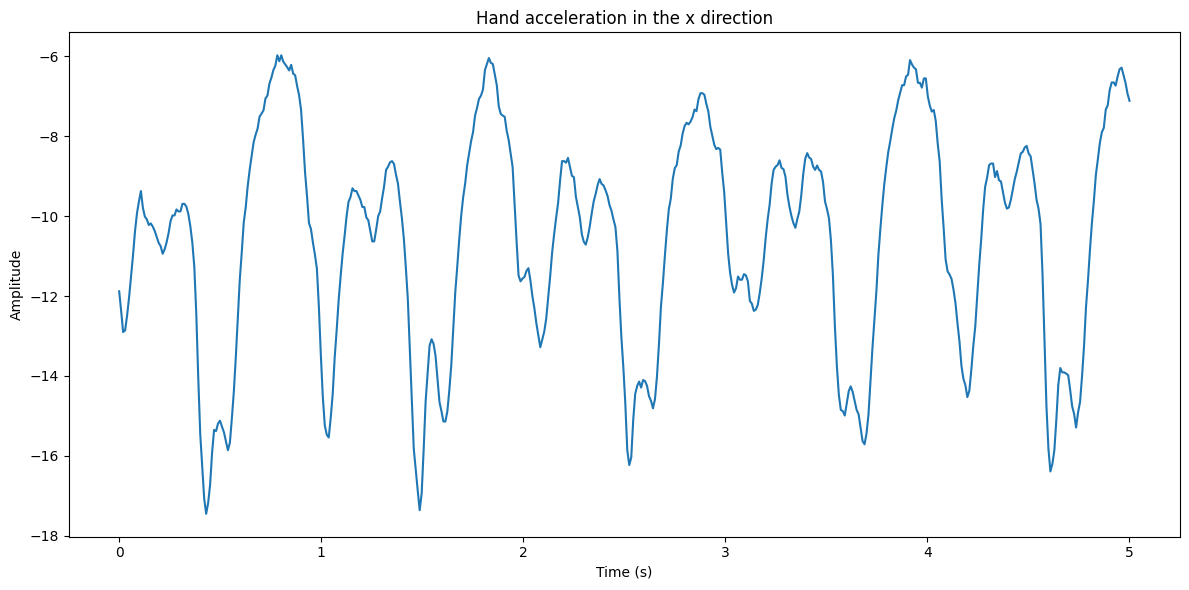

In [28]:
display__ts_feature(cd_number["HAX"],X_train,600)

Test avec une courbe temporelle de hand acceleration

512


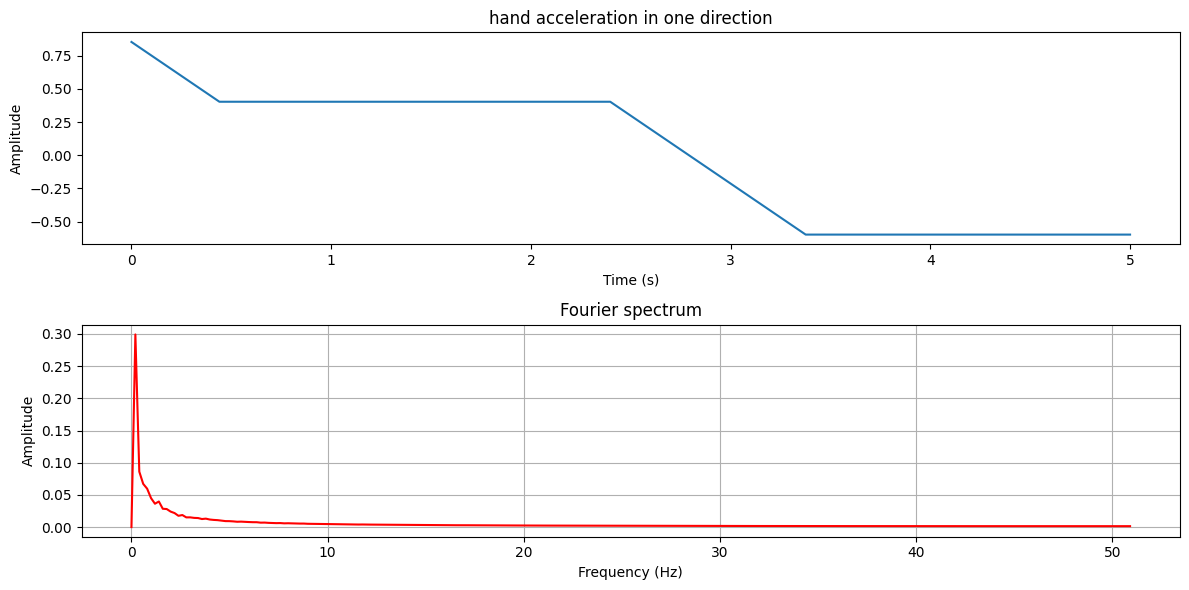

In [ ]:
hand_acceleration = []
j=4
hand_acceleration.extend([X_train[600, 512 * (j - 2) + k] for k in range(0, 512, 1)])
print(len(hand_acceleration))

hand_acceleration = hand_acceleration - np.mean(hand_acceleration)

fft_result = np.fft.fft(hand_acceleration)  # Fourier transform
frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only


plt.figure(figsize=(12, 6))

# plot of heart beat
plt.subplot(2, 1, 1)
plt.plot(duration, hand_acceleration)
plt.title("hand acceleration in one direction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot of fourier spectrum
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_amplitude, 'r')
plt.title("Fourier spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

Function that calculates the major frequencies of a signal

In [ ]:
def signal_frequencies(signal,duration,threshold,DC=False,time_step=5/511):
    """
        calculates the major frequencies of a signal:
        signal is a numpy table with the signal points
        duration is a numpy table containing the time steps related to the signal points
        threshold is the number of frequencies we want to have 
        DC = True if we don't remove the constant signal 
        DC = False (default value) if we remove the constant signal 
        time_step is the time between two points
    """

    if type(threshold) != int :
        raise ValueError("threshold is not an integer in function signal_frequencies")
    elif len(signal) != len(duration):
        raise ValueError("signal and duration have not the same size in function signal_frequencies")
    
    if DC == False:
        signal = signal - np.mean(signal) #remove the constant signal
    

    FAIRE UNE BOUCLE SUR THRESHOLD POUR TROUVER LE MAX ET LA FREQUENCE CORRESPONDANTE PUIS SUPPRIMER LE PIC CORRESPONDANT ET RECOMMENCER 

    fft_result = np.fft.fft(signal)  # Fourier transform
    frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
    amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
    positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
    positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only

    arg_max = np.argmax(positive_amplitude)
    max_frequency = positive_freqs[arg_max]

    if threshold > 1 :

        faire une boucle 



